# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and link them in your notebook.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
%matplotlib inline

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json

In [2]:
data_folder = './data/'

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than y.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

## a)

In [3]:
# Create the map (need to recreate it everytime, otherwise some information stay if multiple use of the same instance)
topo_json_data = json.load(open(data_folder + 'ch-cantons.topojson.json'))
def createMap():
    m = folium.Map(location=[46.7, 8.3], zoom_start = 8,tiles='cartodbpositron')

    # Add cantons borders
    folium.TopoJson(topo_json_data,'objects.cantons').add_to(m)

    return m

cantons_map = createMap()
cantons_map.save('Cantons_Map.html')
cantons_map

[Link to map](Cantons_Map.html)

## b)

In [4]:
# Open data
raw_data = pd.read_excel(data_folder + 'communes_pop.xls', '2017')
raw_data.head(10)

su-f-01.02.04.07  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
5                      Suisse 2)   
6                       - Zürich   
7            >> Bezirk Affoltern   
8     ......0001 Aeugst am Albis   
9  ......0002 Affoltern am Albis   

  Bilan de la population résidante permanente selon les districts et les communes, en 2017  \
0                                                NaN                                         
1                                                NaN                                         
2                                         Etat de la                                         
3                                         population                                         
4                                     au 1er janvier                                         
5                                            8419550                                         
6                                            1487969                                         
7                                              52904                                         
8                                               1977                                         
9                                              11900                                         

                                    Unnamed: 2  Unnamed: 3     Unnamed: 4  \
0                                                                     NaN   
1  Composantes de l'évolution de la population         NaN            NaN   
2                                   Naissances       Décès  Accroissement   
3                                     vivantes         NaN        naturel   
4                                          NaN         NaN            NaN   
5                                        87381       66971          20410   
6                                        17070       11076           5994   
7                                          517         310            207   
8                                           10           7              3   
9                                          128          93             35   

    Unnamed: 5 Unnamed: 6     Unnamed: 7    Unnamed: 8      Unnamed: 9  \
0          NaN        NaN            NaN           NaN             NaN   
1          NaN        NaN            NaN           NaN             NaN   
2  Arrivées 1)    Départs          Solde   Divergences      Etat de la   
3          NaN        NaN  migratoire 1)  statistiques      population   
4          NaN        NaN            NaN                au 31 décembre   
5       681011     635063          45948         -1778         8484130   
6       120593     108666          11927         -1544         1504346   
7         4501       3862            639            21           53771   
8          129        165            -36            -3            1941   
9         1239       1029            210             1           12146   

  Unnamed: 10 Unnamed: 11  
0         NaN         NaN  
1  Variation          NaN  
2  en nombres        en %  
3     absolus         NaN  
4         NaN         NaN  
5       64580    0.767024  
6       16377     1.10063  
7         867     1.63882  
8         -36    -1.82094  
9         246     2.06723

In [5]:
# Rename columns and useless rows
raw_data.columns = ['Name', 'Population_beginning', 'Births', 'Deaths', 'Growth', 'Arrivals', 'Departures', 'Migration', 'Statistical_divergence', 'Population_end', 'Absolute_variation', 'Relative_variation']
clean_data = raw_data.drop([0,1,2,3,4, 2412, 2413, 2414, 2415, 2416, 2417, 2418])

# Set the correct types
clean_data['Name'] = clean_data['Name']
clean_data['Population_beginning'] = clean_data['Population_beginning'].astype(int)
clean_data['Births'] = clean_data['Births'].astype(int)
clean_data['Deaths'] = clean_data['Deaths'].astype(int)
clean_data['Growth'] = clean_data['Growth'].astype(int)
clean_data['Arrivals'] = clean_data['Arrivals'].astype(int)
clean_data['Departures'] = clean_data['Departures'].astype(int)
clean_data['Migration'] = clean_data['Migration'].astype(int)
clean_data['Statistical_divergence'] = clean_data['Statistical_divergence'].astype(int)
clean_data['Population_end'] = clean_data['Population_end'].astype(int)
clean_data['Absolute_variation'] = clean_data['Absolute_variation'].astype(int)
clean_data['Relative_variation'] = clean_data['Relative_variation'].astype(float)

# Split the data into cantons, districts and communes
canton_pop = clean_data[clean_data['Name'].str.contains('- ')].reset_index(drop=True)
district_pop = clean_data[clean_data['Name'].str.contains('>>')].reset_index(drop=True)
commune_pop = clean_data[clean_data['Name'].str.contains('\.\.')].reset_index(drop=True)

1493.5

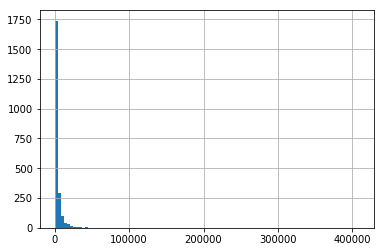

In [6]:
commune_pop.Population_end.hist(bins=100)
commune_pop.Population_end.median()

In [7]:
#Show the outiliers with the less/most inhabitants to have an idea
print(commune_pop.sort_values(by="Population_end", ascending=False).filter(['Name','Population_end']).reset_index(drop=True).head(10))
print(commune_pop.sort_values(by="Population_end", ascending=True).filter(['Name','Population_end']).reset_index(drop=True).head(10))

                     Name  Population_end
0       ......0261 Zürich          409241
1       ......6621 Genève          200548
2        ......2701 Basel          171513
3     ......5586 Lausanne          138905
4         ......0351 Bern          133798
5   ......0230 Winterthur          110912
6       ......1061 Luzern           81401
7   ......3203 St. Gallen           75522
8       ......5192 Lugano           63494
9  ......0371 Biel/Bienne           54640
                     Name  Population_end
0      ......5102 Corippo              12
1  ......2549 Kammersrohr              29
2       ......6172 Bister              32
3     ......0708 Schelten              34
4    ......3707 Lohn (GR)              42
5   ......0715 Rebévelier              42
6       ......0972 Berken              43
7  ......0661 Clavaleyres              46
8     ......5315 Linescio              48
9    ......5309 Cerentino              49


We see that the huge majority of communs are only villages, with at most a few thousands inhabitants. By computing the median (which is ~1493), this confirms our intuition. This result makes our plot quite useless since we can't see any data for bigger communs.
The outliers are the big cities of Switzerland like Zürich (by far, ~400'000 inhabitants) and others like Geneva, Basel, Lausanne or Bern (200'000-135'000 inhabitants). The outliers in the other side of the graph are less noticeable and form a more compact mass, with Corripo as the smallest commun, having only 12 inhabitants.

## c)

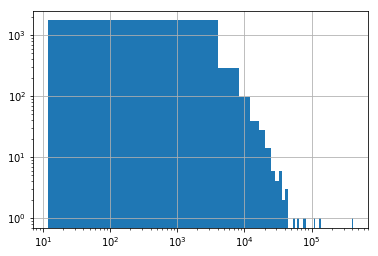

In [8]:
# Graph b1) with 100 bins, logarithmic x and y axis
plt = commune_pop.Population_end.hist(bins = 100)
plt.set_xscale('log')
plt.set_yscale('log')

In [9]:
# Graph b2) with 100 logarithmic bins, logarithmic x and y axis
plt = commune_pop.Population_end.hist(bins=np.logspace(np.log10(10),np.log10(430000), 100))
plt.set_xscale('log')
plt.set_yscale('log')

The graph (b2) does not look like the Fig.(b), meaning it is not a power law but an exponential law. We could be tempted to think it is one from graph (b1) but the use of absolute bins instead of logarithmics ones give a completly wrong idea and are not a good indicator with both log axis.

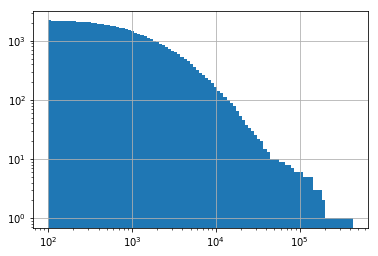

In [10]:
# Graph d) with 1000 logarithmic bins (starting from 100 to 430'000, which are close to the most outliers) with cumulative distribution, logarithmic x and y axis
plt = commune_pop.Population_end.hist(bins=np.logspace(np.log10(100),np.log10(430000), 100), cumulative=-1)
plt.set_xscale('log')
plt.set_yscale('log')

The graph looks between a curve and a line near its middle. If it were be a power law, it should be a straight line.

## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [11]:
voters_raw = pd.read_excel(data_folder + 'voters.xls', 'actuel (2014-2018)')
cantons_raw = pd.read_csv(data_folder + 'cantons.csv')
eligible_raw = pd.read_excel(data_folder + 'national_council_elections.xlsx', '2015')

In [12]:
cantons_clean = cantons_raw.filter(['Code', 'Canton of'])
cantons_clean

Code               Canton of
0    ZH                  Zürich
1    BE                    Bern
2    LU                  Luzern
3    UR                     Uri
4    SZ                  Schwyz
5    OW                Obwalden
6    NW               Nidwalden
7    GL                  Glarus
8    ZG                     Zug
9    FR                Fribourg
10   SO               Solothurn
11   BS             Basel-Stadt
12   BL        Basel-Landschaft
13   SH            Schaffhausen
14   AR  Appenzell Ausserrhoden
15   AI   Appenzell Innerrhoden
16   SG              St. Gallen
17   GR                 Grisons
18   AG                  Aargau
19   TG                 Thurgau
20   TI                  Ticino
21   VD                    Vaud
22   VS                  Valais
23   NE               Neuchâtel
24   GE                  Geneva
25   JU                    Jura

In [13]:
# Only keep usefull columns and rename them
voters_clean = voters_raw.filter(['Elections des parlements cantonaux, de 2014 à 2018: force des partis et attribution des listes mixtes* aux partis','Unnamed: 3','Unnamed: 8','Unnamed: 10'])
voters_clean.columns = ['Canton','Participation','PS','UDC']

# remove useless rows
voters_clean = voters_clean[5:35]
voters_clean = voters_clean.drop([10, 16, 22, 28]).reset_index(drop=True)

# Concat the cantons code with the percentages of voters per cantons (We checked that it was aligned)
voters_canton_code = pd.concat((cantons_clean, voters_clean), axis=1)

# Create overlay for NAN cantons
tp_nan = json.load(open(data_folder + 'ch-cantons.topojson.json'))
tp_nan['objects']['cantons']['geometries'] = [canton for canton in tp_nan['objects']['cantons']['geometries']\
                                                     if canton['id'] in voters_canton_code[voters_canton_code.isna().any(axis=1)].Code.tolist()]

# To avoid wrong color scale, we will the nan (tp_nan) with the value from the row above
voters_canton_code = voters_canton_code.fillna(method='ffill')

voters_canton_code = voters_canton_code.dropna().filter(['Code','Canton of','Participation', 'PS', 'UDC'])
voters_canton_code.Participation = voters_canton_code.Participation.astype(float)
voters_canton_code.PS = voters_canton_code.PS.astype(float)
voters_canton_code.UDC = voters_canton_code.UDC.astype(float)
voters_canton_code

Code               Canton of  Participation         PS        UDC
0    ZH                  Zürich      32.652497  19.716444  30.023215
1    BE                    Bern      30.516313  22.328775  26.760869
2    LU                  Luzern      38.741267  11.848915  24.115646
3    UR                     Uri      61.989056  12.984966  24.053191
4    SZ                  Schwyz      37.747088  12.925363  33.115090
5    OW                Obwalden      53.793314  15.090867  24.532303
6    NW               Nidwalden      54.921606   4.470053  25.916631
7    GL                  Glarus      29.489675  12.750408  25.275361
8    ZG                     Zug      42.939437   9.250912  23.631802
9    FR                Fribourg      39.302102  23.584309  19.717606
10   SO               Solothurn      35.346363  21.412308  19.734534
11   BS             Basel-Stadt      41.659853  32.481128  14.297919
12   BL        Basel-Landschaft      33.845621  21.995307  26.741611
13   SH            Schaffhausen      53.909827  22.830538  35.072440
14   AR  Appenzell Ausserrhoden      36.111260  11.475833  16.281936
15   AI   Appenzell Innerrhoden      36.111260  11.475833  16.281936
16   SG              St. Gallen      45.339739  15.966947  29.549176
17   GR                 Grisons      45.339739  15.966947  29.549176
18   AG                  Aargau      32.805153  18.918913  31.937510
19   TG                 Thurgau      30.376372  13.093600  32.555828
20   TI                  Ticino      62.265919  14.636514   4.286326
21   VD                    Vaud      38.924626  23.438908  15.842675
22   VS                  Valais      57.526502  10.451658  16.437539
23   NE               Neuchâtel      33.441324  23.582051  11.489286
24   GE                  Geneva      37.719442  15.299358   7.315683
25   JU                    Jura      50.570590  20.047550  11.980336

### a)

In [14]:
# Create a choropleth of the swiss cantons. Put in grey the cantons with no data
def choroPlotCanton(data1, columns, key_on1, color, legend, topo_no_data, cantons_no_data_position):
    m = createMap()
    
    #Cantons with data
    m.choropleth(geo_data=topo_json_data, topojson='objects.cantons', data=data1,
             columns=columns,
             key_on=key_on1,
             fill_color=color, fill_opacity=0.7, line_opacity=0.2,
             legend_name=legend)

    #Grey for cantons with no data
    folium.TopoJson(topo_no_data,'objects.cantons',
        style_function=lambda feature: {
        'fillColor': '#b5b5b5',
        'fillOpacity': 1,
        'lineOpacity': 0, 
        'weight' : 0.2
        }).add_to(m)
    
    #Add markers on cantons with no data
    for position in cantons_no_data_position:
        folium.Marker(position, popup="No Data available").add_to(m)
        
    return m

In [15]:
votes_udc_map = choroPlotCanton(voters_canton_code, ['Code', 'UDC'], 'feature.id', 'BuPu', 'Percentage of votes for UDC (%)', tp_nan, [[46.727, 9.607],[47.3322, 9.429]])
votes_udc_map.save('Votes_UDC_Map.html')
votes_udc_map

[Link to map](Votes_UDC_Map.html)

We observe that UDC seems to be more popular in the Swiss-German region. This could be because almost all important UDC-politicians are Swiss-German: Blocher, Maurer, Köppel, Mörgeli .., but also because swiss-german are often more conservative than the rest of Switzerland.

### b)

In [16]:
#Clean nan, remove useless columns and rename columns
eligible_clean = eligible_raw.dropna()
eligible_clean.columns = ['Canton of', 'Total voters', 'Total voted', 'Participation (%)']
eligible_clean = eligible_clean.filter(['Canton of', 'Total voters'])

#Remove useless row and format data
eligible_clean = eligible_clean.drop([6]).reset_index(drop=True)
eligible_clean['Canton of'] = eligible_clean['Canton of'].map(lambda x: x.replace(" 1)", ""))
eligible_clean

Canton of Total voters
0               Zurich       907623
1                Berne       729203
2              Lucerne       271143
3                  Uri        26414
4              Schwytz       102145
5               Obwald        26244
6              Nidwald        30810
7               Glaris        26268
8                 Zoug        74803
9             Fribourg       196027
10             Soleure       177292
11          Bâle-Ville       113717
12       Bâle-Campagne       187863
13         Schaffhouse        51036
14  Appenzell Rh.-Ext.        38498
15  Appenzell Rh.-Int.        11565
16          Saint-Gall       317969
17             Grisons       137126
18             Argovie       414745
19           Thurgovie       167720
20              Tessin       218580
21                Vaud       428569
22              Valais       216041
23           Neuchâtel       111304
24              Genève       248915
25                Jura        51936

In [17]:
voters_canton_amount = pd.merge(voters_canton_code, eligible_clean, left_index=True, right_index=True)
voters_canton_amount['Total voters'] = voters_canton_amount.apply(lambda x: x['Total voters']*x['UDC']/100, axis=1)
voters_canton_amount = voters_canton_amount.filter(['Code','Total voters'])
voters_canton_amount['Total voters'] = voters_canton_amount['Total voters'].astype(int)

votes_abs_udc_map = choroPlotCanton(voters_canton_amount, ['Code', 'Total voters'], 'feature.id', 'BuPu', 'UDC votes per canton', tp_nan, [[46.727, 9.607],[47.3322, 9.429]])
votes_abs_udc_map.save('Votes_Abs_UDC_Map.html')
votes_abs_udc_map

[Link to map](Votes_Abs_UDC_Map.html)

We see that now a different picture is presented. Zürich and Bern seem now much more important. This is because there are many people in those cantons, so with the same percentage voting for UDC, more people are voting for them.

### c)
For national majority voting, the second map is more important. If we were strategists for PS wanting to steal voters from UDC, we would want to bring the most voters to our side. This is most effective by targeting cantons with the most amout of voters for UDC. 

An extreme example for this is the following:
If we had two cantons, canton A with 1000 people and canton B with 10 people. Even if in canton A already 40% vote for us and in canton B none, it would not be worth bothering to swing these 10 voters in canton B as they would change nothing on the national scale.

For canntonal parlament elections, the first map would be more informative since we would want to gain the majority in every canton.

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

### a)

In [18]:
voters_canton_code['rightLean']=voters_canton_code.apply(lambda x: (x.UDC-x.PS)/(x.UDC+x.PS), axis=1)

right_lean_map = choroPlotCanton(voters_canton_code, ['Code', 'rightLean'], 'feature.id', 'PRGn', 'Right Lean', tp_nan, [[46.727, 9.607],[47.3322, 9.429]])
right_lean_map.save('Right_Lean_Map.html')
right_lean_map

[Link to map](Right_Lean_Map.html)

We see that the röstigraben clearly exists! Swiss-German cantons tend to have a right-lean, while Swiss-French cantons have a left-lean. The canton of Ticino often votes similar to the Swiss-French part, which also shows in its election results.

### b)

In [19]:
# We will now do the same as before, but for the percentage of votes from 2010 to 2013 : 
voters_raw_prev = pd.read_excel(data_folder + 'voters.xls', '2010-2013')

In [20]:
# Only keep usefull columns and rename them
voters_clean_prev = voters_raw_prev.filter(['Elections des parlements cantonaux, de 2010 à 2013: force des partis et attribution des listes mixtes* aux partis','Unnamed: 3','Unnamed: 8','Unnamed: 10'])
voters_clean_prev.columns = ['Canton','Participation','PS','UDC']

# remove useless rows
voters_clean_prev = voters_clean_prev[5:35]
voters_clean_prev = voters_clean_prev.drop([10, 16, 22, 28]).reset_index(drop=True)

# Concat the cantons code with the percentages of voters per cantons (We checked that it was aligned)
voters_canton_code_prev = pd.concat((cantons_clean, voters_clean_prev), axis=1)

# Some cleaning / formatting
voters_canton_code_prev.replace(to_replace='…', value='Nan', inplace=True) 

voters_canton_code_prev.Participation = voters_canton_code_prev.Participation.astype(float)
voters_canton_code_prev.PS = voters_canton_code_prev.PS.astype(float)
voters_canton_code_prev.UDC = voters_canton_code_prev.UDC.astype(float)

voters_canton_code_prev = voters_canton_code_prev.fillna(method='ffill')

voters_canton_code_prev = voters_canton_code_prev.dropna().filter(['Code','Canton of','Participation', 'PS', 'UDC'])

voters_canton_code_prev

Code               Canton of  Participation         PS        UDC
0    ZH                  Zürich      38.234747  19.317182  29.635552
1    BE                    Bern      32.346446  18.852832  26.621577
2    LU                  Luzern      43.469036  10.964228  22.126508
3    UR                     Uri      49.159126  12.085318  24.629866
4    SZ                  Schwyz      45.113955  12.381160  34.004523
5    OW                Obwalden      52.093919  10.921757  21.122156
6    NW               Nidwalden      52.948511   2.090228  26.614033
7    GL                  Glarus      32.064275  13.920524  26.328971
8    ZG                     Zug      43.561967  10.264115  22.725281
9    FR                Fribourg      43.383026  24.252459  18.593468
10   SO               Solothurn      43.277539  19.071914  20.167741
11   BS             Basel-Stadt      41.632265  30.726149  15.025945
12   BL        Basel-Landschaft      35.106423  21.986789  23.984895
13   SH            Schaffhausen      54.025768  22.600032  33.609729
14   AR  Appenzell Ausserrhoden      36.182126  10.981548  17.219986
15   AI   Appenzell Innerrhoden      36.182126  10.981548  17.219986
16   SG              St. Gallen      37.610935  16.171380  25.395358
17   GR                 Grisons      37.610935  16.171380  25.395358
18   AG                  Aargau      31.940784  15.199309  32.002015
19   TG                 Thurgau      30.794385  13.377274  30.467671
20   TI                  Ticino      58.493641  15.066401   5.160618
21   VD                    Vaud      40.600608  25.856905  17.067802
22   VS                  Valais      67.034789  11.892321  17.209446
23   NE               Neuchâtel      30.785912  26.505203  16.889428
24   GE                  Geneva      40.508589  14.330398  10.330838
25   JU                    Jura      48.895997  21.162862   8.548344

In [21]:
# We no have the following : 
# voters_canton_code for 2014-2018
# voters_canton_code_prev for 2010-2013

# Compute the difference in points
voters_diff = pd.DataFrame(voters_canton_code['Code'])
voters_diff['PS'] = voters_canton_code['PS'] - voters_canton_code_prev['PS']
voters_diff['UDC'] = voters_canton_code['UDC'] - voters_canton_code_prev['UDC']
voters_diff

Code        PS       UDC
0    ZH  0.399261  0.387663
1    BE  3.475942  0.139293
2    LU  0.884687  1.989138
3    UR  0.899648 -0.576676
4    SZ  0.544203 -0.889433
5    OW  4.169110  3.410147
6    NW  2.379824 -0.697402
7    GL -1.170117 -1.053610
8    ZG -1.013202  0.906521
9    FR -0.668150  1.124138
10   SO  2.340394 -0.433207
11   BS  1.754979 -0.728026
12   BL  0.008518  2.756716
13   SH  0.230506  1.462711
14   AR  0.494285 -0.938051
15   AI  0.494285 -0.938051
16   SG -0.204433  4.153818
17   GR -0.204433  4.153818
18   AG  3.719604 -0.064505
19   TG -0.283674  2.088157
20   TI -0.429887 -0.874292
21   VD -2.417998 -1.225127
22   VS -1.440663 -0.771908
23   NE -2.923152 -5.400142
24   GE  0.968961 -3.015155
25   JU -1.115312  3.431991

In [22]:
evo_udc_points_map = choroPlotCanton(voters_diff, ['Code', 'UDC'], 'feature.id', 'PRGn', 'Evolution of UDC percentage points', tp_nan, [[46.727, 9.607],[47.3322, 9.429]])
evo_udc_points_map.save("Evo_UDC_Points_Map.html")
evo_udc_points_map

[Link to map](Evo_UDC_Points_Map.html)

In [23]:
evo_ps_points_map = choroPlotCanton(voters_diff, ['Code', 'PS'], 'feature.id', 'PRGn', 'Evolution of PS percentage points', tp_nan, [[46.727, 9.607],[47.3322, 9.429]])
evo_ps_points_map.save("Evo_PS_Points_Map.html")
evo_ps_points_map

[Link to map](Evo_PS_Points_Map.html)

To show the evolution of each party, we had to do two differents maps to make it clear. It would have been hard to represent to diferent values for each canton on the same map. To show the difference in vote-share, we simply computed the difference between the vote share in both years. We used an absolute difference (how many points were gained/lost), and not the relative diference (percentage of increase) because the first one is more easily interpreted. 

Indeed, with a relative increase, we would have the following problem : Assume party A had 1% of votes and Party B 30% of votes. A relative increase of 100% for both party would mean party A has now 2% of votes and party B has now 60% of votes. Since they both have the same relative increase, we might think on first glance that they both did as good, which is clearly not the case. 

We see that UDC was able to gain voters in some Swiss-German cantons, but they lost in the Swiss-French part. PS could also gain votes in many Swiss-German parts, but also lost in the Swiss-French part. This means that some smaller parties gained more votes, while the main two parties lost some votes in the swiss-french part (and the opposite in some swiss-german cantons) It would be interesting to see which parties gained voters in the Swiss-French part, if they are more right (e.g PLR) or left leaning (e.g Les verts), this would give more concrete informations on the evolution of political ideas in those regions.